<a href="https://colab.research.google.com/github/chetanpatidar11/Machine-Learning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dataset = pd.read_csv("Google_Stock_Price_Train.csv")
train_dataset.head()

,Date,Open,High,Low,Close,Volume
0,26-Sep-17,936.69,944.08,935.12,937.43,1672749
1,25-Sep-17,939.45,939.75,924.51,934.28,1873375
2,22-Sep-17,942.77,950.00,940.84,943.26,1074806
3,21-Sep-17,948.13,952.80,939.38,947.55,1370685
4,20-Sep-17,937.73,950.00,937.50,947.54,2004018


In [ ]:
train_dataset['Date'] = pd.to_datetime(train_dataset['Date'])
train_dataset = train_dataset.sort_values(by=['Date'], ascending=True).reset_index()


In [ ]:
train_dataset.head()
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   1258 non-null   int64         
 1   Date    1258 non-null   datetime64[ns]
 2   Open    1258 non-null   float64       
 3   High    1258 non-null   float64       
 4   Low     1258 non-null   float64       
 5   Close   1258 non-null   float64       
 6   Volume  1258 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 68.9 KB


In [ ]:
train_dataset['Close'] = pd.to_numeric(train_dataset['Close'],errors = 'coerce')

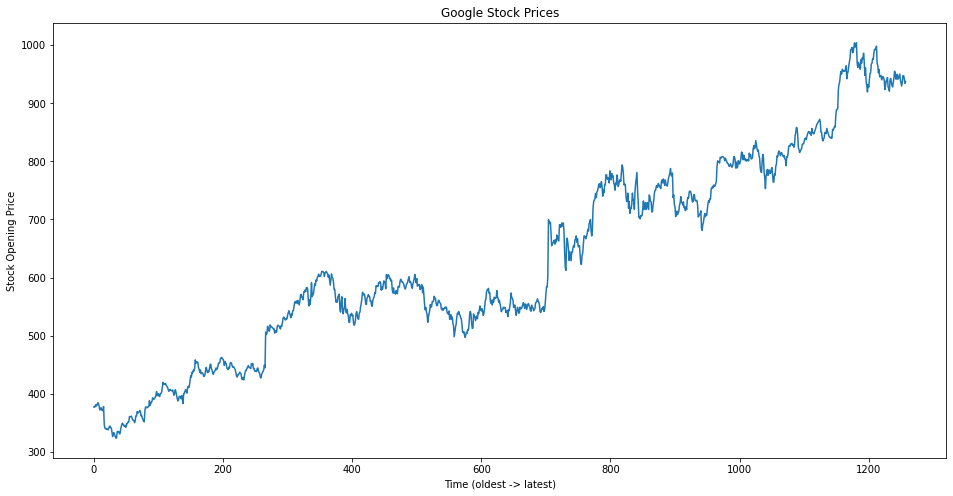

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(train_dataset['Close'])
plt.title("Google Stock Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [ ]:
input_feature = train_dataset[['Open', 'High', 'Low', 'Close']]
input_data = input_feature.values
input_data

array([[375.3 , 381.  , 370.87, 377.11],
       [380.35, 381.8 , 376.2 , 378.63],
       [377.45, 380.03, 375.95, 377.63],
       ...,
       [942.77, 950.  , 940.84, 943.26],
       [939.45, 939.75, 924.51, 934.28],
       [936.69, 944.08, 935.12, 937.43]])

In [ ]:
print(input_data.shape)

(1258, 4)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
input_data[:,:] = scaler.fit_transform(input_data[:,:])

In [ ]:
lookback=50
total_size=len(train_dataset)
X=[]  
y=[] 
for i in range(0, total_size-lookback): 
    t=[]
    for j in range(0, lookback): 
        current_index = i+j
        t.append(input_data[current_index, :]) 
    X.append(t)
    y.append(input_data[lookback+i, 3])

In [ ]:
test_size=100 
X, y= np.array(X), np.array(y)
X_test = X[:test_size]
Y_test = y[:test_size]


X_work = X[test_size:]
y_work = y[test_size:]

validate_size = 10

X_valid = X[:validate_size]
y_valid = y[:validate_size]
X_train = X[validate_size:]
y_train = y[validate_size:]

In [ ]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)

(1208, 50, 4)
(1208,)
(1198, 50, 4)
(1198,)


In [ ]:
from keras import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences= True, activation='relu', input_shape=(X.shape[1], 4)))
model.add(LSTM(50, return_sequences=True, activation='relu'))
model.add(LSTM(50))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            11000     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51,451
Trainable params: 51,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/100
38/38 [==============================] - ETA: 0s - loss: 0.0585 - accuracy: 8.3472e-04
Epoch 1: val_loss improved from inf to 0.01483, saving model to model.h5
38/38 [==============================] - 8s 96ms/step - loss: 0.0585 - accuracy: 8.3472e-04 - val_loss: 0.0148 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/100
38/38 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 8.3472e-04
Epoch 2: val_loss improved from 0.01483 to 0.00038, saving model to model.h5
38/38 [==============================] - 3s 71ms/step - loss: 0.0021 - accuracy: 8.3472e-04 - val_loss: 3.8285e-04 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 8.3472e-04
Epoch 3: val_loss improved from 0.00038 to 0.00025, saving model to model.h5
38/38 [==============================] - 3s 71ms/step - loss: 0.0012 - accuracy: 8.3472e-04 - val_loss: 2.4751e-04 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
38/

In [ ]:
predicted_value = model.predict(X_test)


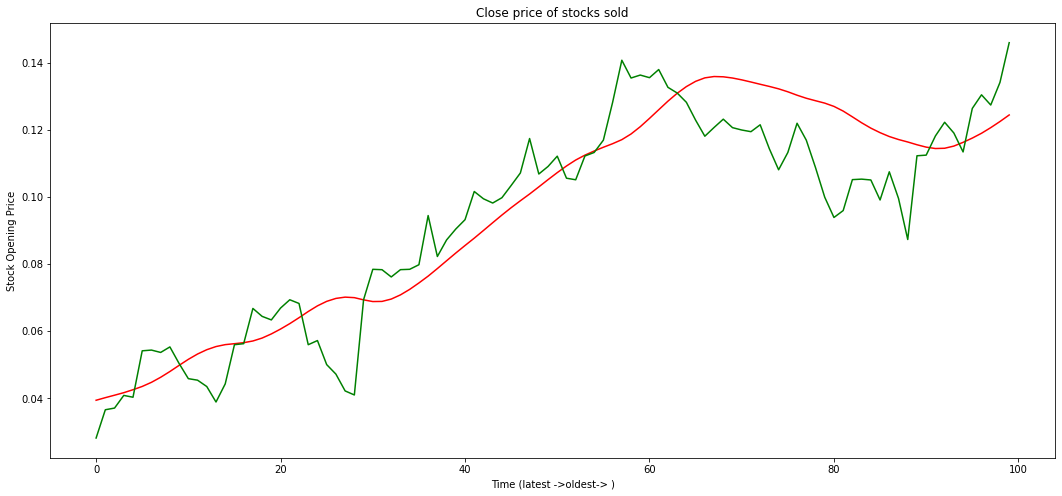

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(predicted_value, color= 'red')
plt.plot(Y_test, color='green')
plt.title("Close price of stocks sold")
plt.xlabel("Time (latest ->oldest-> )")
plt.ylabel("Stock Opening Price")
plt.show()